## Activation energies

In [19]:
import numpy as np
import re
from itertools import islice
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const

import os
import sys
from pathlib import Path
from matplotlib import style
from lmfit import Parameters, fit_report, minimize
from lmfit.models import LinearModel
style.use('default')                # needed for vscode dark theme to see the axis

In [20]:
save_as_pgf = 0
save_as_pdf = 1

if save_as_pgf == 1:
    #mpl.use("pgf")                        
    mpl.rc('text', usetex=True)           # needed for latex
    mpl.rc('pgf', texsystem='pdflatex')   # change this if using xetex or luatex
    mpl.rc('pgf', rcfonts=False)          # don't setup fonts from rc parameters
    mpl.rc('pgf', preamble="\n".join([    # load additional packages
           r"\usepackage[utf8x]{inputenc}",
           r"\usepackage[T1]{fontenc}",
           r"\usepackage{amsmath,amsfonts,amsthm,amssymb,amstext}"]))
    mpl.rc('font', size=8)                # default font size
    mpl.rc('font', family='serif')          # use serif fonts
    #mpl.rc('font', family='sans-serif')   # use sans-serif fonts
    mpl.rc('font', serif='Latin Modern')  # use latex default serif font
    mpl.rc('axes', titlesize=10)           # fontsize of the axes title
    mpl.rc('axes', titlepad=2)            # pad between axis and title
    mpl.rc('axes', labelsize=10)           # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=8)          # fontsize of the tick labels
    mpl.rc('ytick', labelsize=8)          # fontsize of the tick labels
    mpl.rc('legend', fontsize=8)          # legend fontsize
    mpl.rc('figure', titlesize=10)         # fontsize of the figure title
    mpl.rc('lines', markersize=2)         # default line markersize
    mpl.rc('lines', marker="")            # default line marker
    mpl.rc('grid', alpha=0.4)             # transparency of the grid
    mpl.rc('grid', color="gray")          # color of the grid
    mpl.rc('grid', linewidth=0.5)         # linewidth of the grid
    mpl.rcParams['figure.constrained_layout.use'] = True # use constrained_layout
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k", "r", "b", "g", "orange", "purple"]) #matplotlib colororder-default ändern
    lw = 1.0                              # linewidth of the lines

    # width and height of tex document in inches
    # For Katrins Bachelor thesis
    # in Latex:
    # \usepackage{layouts}
    # textwidth in inches: \printinunitsof{in}\prntlen{\textwidth}
    
    fig_width = 6.202
    fig_height = fig_width * 0.6
    
elif save_as_pdf == 1:
    normal = 9                              # fontsize of the text
    mpl.rc('font', size=normal+2)             # default font size
    mpl.rc('font', family='serif')          # use serif fonts
    mpl.rc('axes', titlesize=normal)        # fontsize of the axes title
    mpl.rc('axes', titlepad=5)              # pad between axis and title
    mpl.rc('axes', labelpad=7)              # pad between axis and label
    mpl.rc('axes', labelsize=normal+2)      # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=normal)       # fontsize of the tick labels
    mpl.rc('ytick', labelsize=normal)       # fontsize of the tick labels
    mpl.rc('legend', fontsize=normal)       # legend fontsize
    mpl.rc('figure', titlesize=normal+4)    # fontsize of the figure title
    mpl.rc('lines', markersize=12)          # default line markersize
    mpl.rc('lines', marker="")              # default line marker
    mpl.rc('grid', alpha=0.4)               # transparency of the grid              
    mpl.rc('grid', color="gray")            # color of the grid
    mpl.rc('grid', linewidth=0.5)           # linewidth of the grid
    mpl.rcParams["xtick.major.size"] = 8    # major tick size in points
    mpl.rcParams["ytick.major.size"] = 8    # major tick size in points
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k", "r", "b", "g", "orange", "purple"]) #matplotlib colororder-default ändern
    
    lw = 2
    ms_4 = 4
    ms_8 = 8

    # height and width for nice print in jupyter notebook
    fig_width = 8
    fig_height = 5
    
else:
    mpl.rc('font', size=16)                 # controls default text sizes
    mpl.rc('axes', titlesize=16)            # fontsize of the axes title
    mpl.rc('axes', labelsize=18)            # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=16)           # fontsize of the tick labels
    mpl.rc('ytick', labelsize=16)           # fontsize of the tick labels
    mpl.rc('legend', fontsize=18)           # legend fontsize
    mpl.rc('figure', titlesize=18)          # fontsize of the figure title
    mpl.rc('grid', alpha=0.4)
    mpl.rc('lines', markersize=10)    
    
    

def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")

def save_plot_as_pdf(fig, path):
  if save_as_pdf == 1:
    fig.savefig(path, format="pdf", bbox_inches='tight')


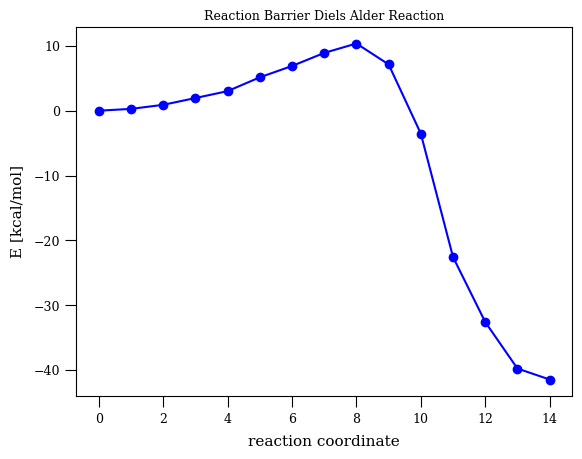

In [21]:
# load data for reaction barrier plot

# Diels Alder

#with open('plots/claisen_path.dat', 'r') as f:
#    lines = f.readlines()

DA = np.loadtxt('Diels_Alder/plots/DA_path.dat', usecols=(0))
X = np.loadtxt('Diels_Alder/plots/DA_path.dat', usecols=(1))

plt.plot(X, DA, 'b-', marker='.')  # Plot für den ersten y-Wert

plt.xlabel('reaction coordinate')  # Beschriftung der x-Achse
plt.ylabel('E [kcal/mol]')  # Beschriftung der y-Achse

plt.title('Reaction Barrier Diels Alder Reaction')  # Titel des Graphen

# save plot
plt.savefig('Diels_Alder_Barrier.pdf', format='pdf')  # Save the graph as PDF

plt.show()  # Graph anzeigen



siehe Hefter: single point calc ergibt Barriere von 16.97 kcal/mol

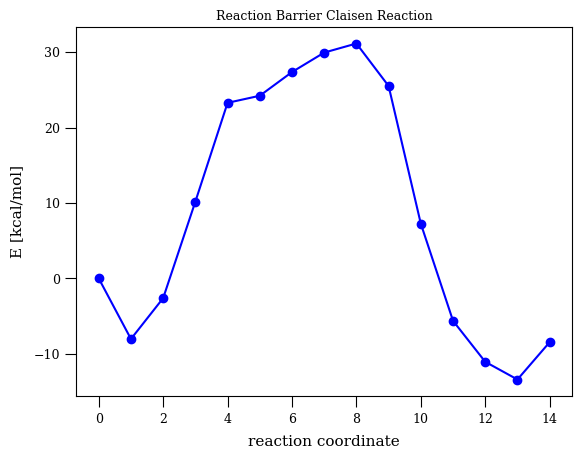

In [22]:
# load data for reaction barrier plot

# Claisen

DA = np.loadtxt('Claisen_rearrangement_2/plots/claisen_path.dat', usecols=(0))
X = np.loadtxt('Claisen_rearrangement_2/plots/claisen_path.dat', usecols=(1))

plt.plot(X, DA, 'b-', marker='.')  # Plot für den ersten y-Wert

plt.xlabel('reaction coordinate')  # Beschriftung der x-Achse
plt.ylabel('E [kcal/mol]')  # Beschriftung der y-Achse

plt.title('Reaction Barrier Claisen Reaction')  # Titel des Graphen

# save plot
#plt.savefig('Diels_Alder_Barrier.pdf', format='pdf')  # Save the graph as PDF

plt.show()  # Graph anzeigen

Claisen 3 looking best

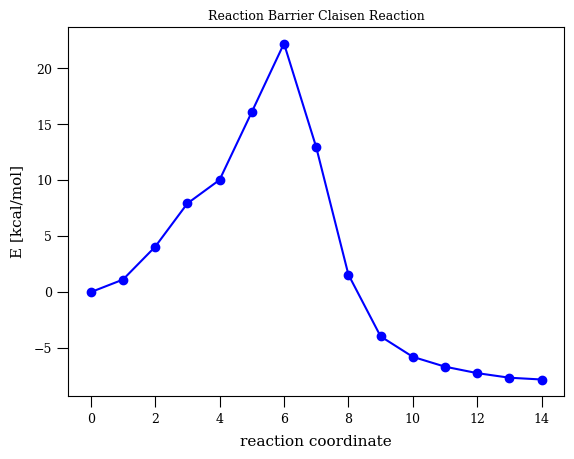

In [23]:
# load data for reaction barrier plot

# Claisen

DA = np.loadtxt('Claisen_rearrangement_3/plots/claisen_path.dat', usecols=(0))
X = np.loadtxt('Claisen_rearrangement_3/plots/claisen_path.dat', usecols=(1))

plt.plot(X, DA, 'b-', marker='.')  # Plot für den ersten y-Wert

plt.xlabel('reaction coordinate')  # Beschriftung der x-Achse
plt.ylabel('E [kcal/mol]')  # Beschriftung der y-Achse

plt.title('Reaction Barrier Claisen Reaction')  # Titel des Graphen

# save plot
plt.savefig('Claisen_Barrier.pdf', format='pdf')  # Save the graph as PDF

plt.show()  # Graph anzeigen